In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv("raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Headline Length

In [3]:
df['headline_length'] = df['headline'].astype(str).str.len()
df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

### Articles Per Publisher

<Axes: ylabel='publisher'>

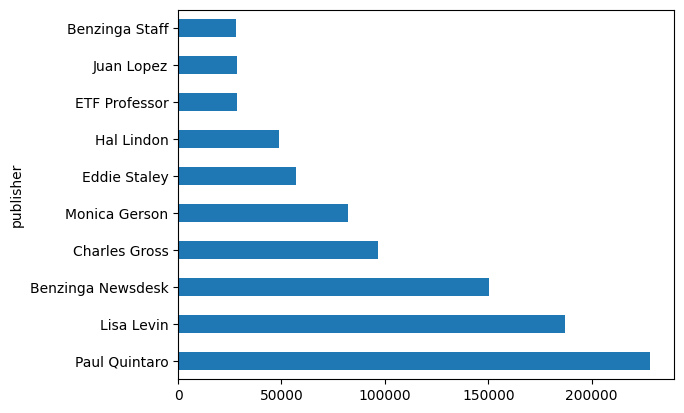

In [4]:
df['publisher'].value_counts().head(10).plot(kind='barh')

### Publication Date Trends

In [11]:
print(df.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length', 'domain'],
      dtype='object')


<Axes: xlabel='date'>

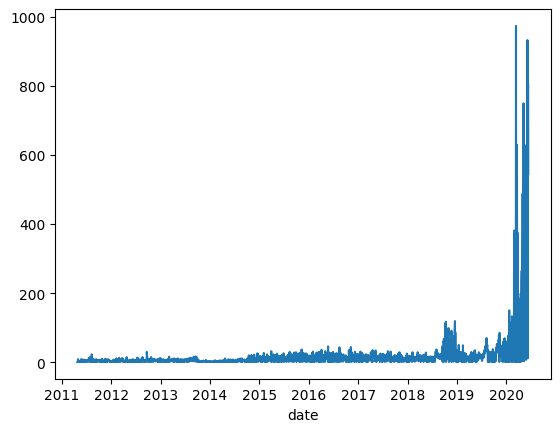

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'].dt.date.value_counts().sort_index().plot()

### Publication By Hour

<Axes: xlabel='hour'>

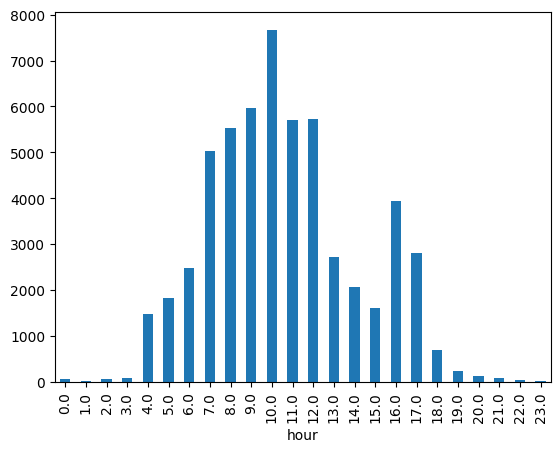

In [18]:
df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar')

### Publisher Email Domains

<Axes: ylabel='domain'>

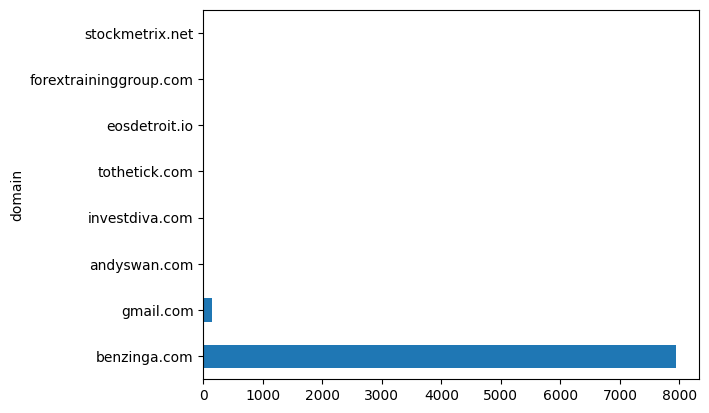

In [7]:
df['domain'] = df['publisher'].str.extract(r'@(\w+\.\w+)')
df['domain'].value_counts().head(10).plot(kind='barh')